## Análise Exploratória de Dados 

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('KaggleV2-May-2016.csv')
data.shape

(110527, 14)

In [4]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [120]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')

### Pacientes

Nº de pacientes: 62299
Nº máximo de consultas de um paciente: 88


0.6086775068620685

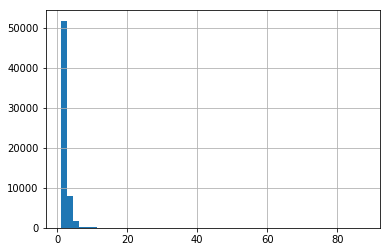

In [73]:
pacientes_consultas = data['PatientId'].value_counts()
print("Nº de pacientes:", pacientes_consultas.count())
print("Nº máximo de consultas de um paciente:", pacientes_consultas.max())
pacientes_consultas.hist(bins=50)

In [132]:
### Pacientes com maior quantidade de consultas 
pacientes_consultas.sort_values(ascending=False).head(10)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
Name: PatientId, dtype: int64

In [145]:
### Porcentagem de pacientes que tem apenas uma consulta
pacientes_consultas[pacientes_consultas == 1].shape[0] / pacientes_consultas.shape[0] * 100

60.86775068620685

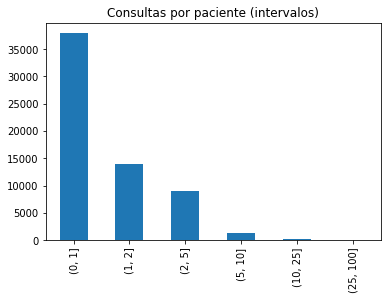

In [149]:
### Intervalos

# labels=['x<=1', '1<x<=2', '2<x<=5', '5<x<=10', '10<x<=25', '25<x<=100]
pd.cut(pacientes_consultas, [0, 1, 2, 5, 10, 25, 100]).value_counts().plot(kind='bar', title='Consultas por paciente (intervalos)')

#### Anotação:
A informação é relevante para considerarmos o "histórico" do paciente. Não olhar apenas a consulta isolada, mas o retrospecto do paciente, o que permite criar novas features.

### Gênero

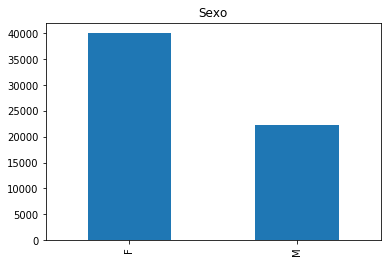

In [150]:
data.drop_duplicates('PatientId')['Gender'].value_counts().plot(kind='bar', title='Sexo')

### Datas

In [93]:
print("Primeira consulta:" ,data['AppointmentDay'].min())
print("Última consulta:", data['AppointmentDay'].max())

Primeira consulta: 2016-04-29 00:00:00
Última consulta: 2016-06-08 00:00:00


In [97]:
print("Primeiro agendamento:" , data['ScheduledDay'].min())
print("Último agendamento:", data['ScheduledDay'].max())

Primeiro agendamento: 2015-11-10 07:13:56
Último agendamento: 2016-06-08 20:07:23


In [148]:
# data['AppointmentDay'].value_counts().plot(kind='bar') -- # falta terminar

### Idade

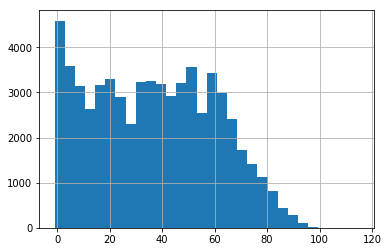

In [152]:
data.drop_duplicates('PatientId')['Age'].hist(bins=30)

### Bairro

81


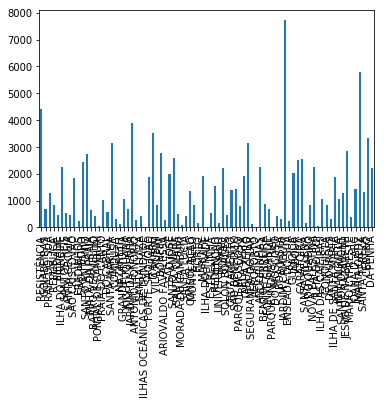

In [146]:
print('Nº de bairros:', data['Neighbourhood'].unique().size)
data['Neighbourhood'].value_counts(sort=False).plot(kind='bar')

### Outras variáveis binárias

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D6B94E6A0>,
      dtype=object)

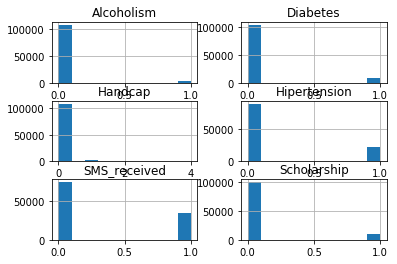

In [160]:
data[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].hist()

### Balanceamento da classe alvo (No-show)

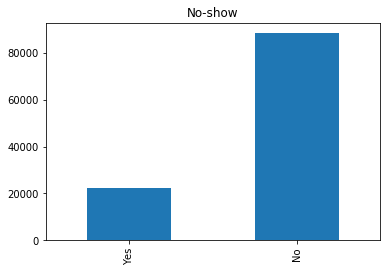

In [154]:
data['No-show'].value_counts(sort=False).plot(kind='bar', title='No-show')

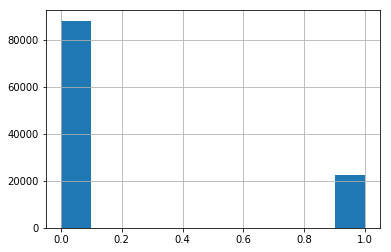

In [167]:
# data['No-show'].hist() #plot(kind='bar', title='No-show')
data['No-show'].replace('Yes', 1).replace('No', 0).hist() #plot(kind='bar', title='No-show')
# data['No-show'].value_counts(sort=False).plot(kind='bar', title='No-show')